In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

from pyCascade import probePost, physics, utils
from matplotlib import pyplot as plt
import numpy as np
import os
from IPython.core.debugger import set_trace
import pandas as pd

category =  "config1"

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)

'/scratch/users/nbachand/Cascade/city_block_cfd'

'/home/users/nbachand/Cascade/city_block_cfd'

In [2]:
hm = 6
window_dim = hm/2/4

velocity_scaling = 1
ventilation_scaling = velocity_scaling/(window_dim**2)

norm_vel = probePost.quick_dict_apply(lambda data_df: data_df*velocity_scaling)
norm_vent = probePost.quick_dict_apply(
    lambda data_df: data_df*velocity_scaling)
abs_values = probePost.quick_dict_apply(lambda df: df.abs())
norm_data = lambda data_df : data_df*ventilation_scaling
flip_data = probePost.quick_dict_apply(lambda data_df: -data_df)


In [3]:
start = -250000
stop = -1000
by = 1

# Run 2 - 0 deg wind

In [4]:
run = 2

probes_dir = f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut'

probes2 = probePost.Probes(probes_dir)
probes2.get_locations(probes_dir)


## X Flow


processing data took 13 seconds
processing data took 13 seconds
processing data took 13 seconds
processing data took 13 seconds


,"comp(u,0)"
xwindow_0-0,-0.045139
xwindow_0-0_skylights,0.055857
xwindow_0-1,-0.057654
xwindow_0-1_skylights,0.010584


,"comp(u,0)"
xwindow_0-0,0.123425
xwindow_0-0_skylights,0.152746
xwindow_0-1,0.137853
xwindow_0-1_skylights,0.151563


,"comp(u,0)"
xwindow_0-0,0.106345
xwindow_0-0_skylights,0.131838
xwindow_0-1,0.122265
xwindow_0-1_skylights,0.121881


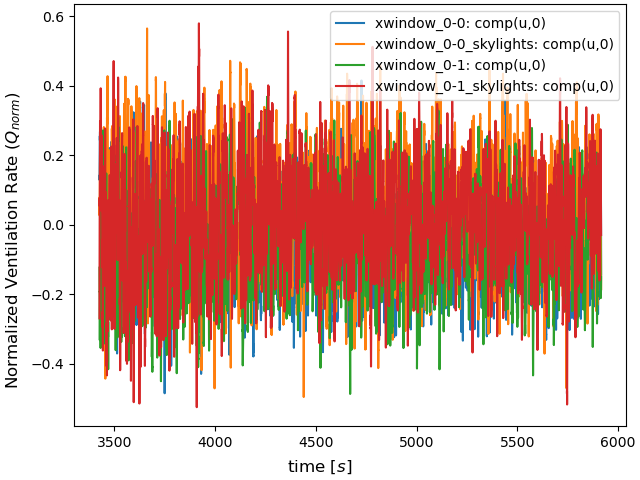

In [5]:
norm_norm = probePost.quick_apply(
    lambda df: probePost.mul_names(df, ['xwindow_2-0', 'xwindow_2-1'], -1)
)

(fig, ax) = probes2.time_plots(
    names = [name for name in  probes2.probe_names if "xwindow" in name], 
    steps = probes2.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes2.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature, norm_norm],
    parrallel=True
    )

## mean statistics
x_mean = probes2.statistics(
    names = [name for name in  probes2.probe_names if "xwindow" in name], 
    steps = probes2.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average, norm_norm],
    parrallel=False
    )

## rms statistics
x_rms = probes2.statistics(
    names = [name for name in  probes2.probe_names if "xwindow" in name], 
    steps = probes2.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
x_net = probes2.statistics(
    names = [name for name in  probes2.probe_names if "xwindow" in name], 
    steps = probes2.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )


display(x_mean)
display(x_rms)
display(x_net)

In [6]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/xwindows')

x_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xmean.csv')
x_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xrms.csv')
x_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xnet.csv')

## Z Flow


processing data took 40 seconds
processing data took 40 seconds
processing data took 39 seconds
processing data took 32 seconds


,"comp(u,2)"
zwindow_0-0,0.053514
zwindow_0-0_skylights,0.175033
zwindow_0-1,-0.072214
zwindow_0-1_skylights,-0.007391
zwindow_1-0,-0.008458
zwindow_1-0_skylights,-0.008526
zwindow_1-1,0.165886
zwindow_1-1_skylights,-0.250675
zwindow_2-0,-0.033195
zwindow_2-0_skylights,0.005817


,"comp(u,2)"
zwindow_0-0,0.128049
zwindow_0-0_skylights,0.142999
zwindow_0-1,0.133021
zwindow_0-1_skylights,0.146841
zwindow_1-0,0.006968
zwindow_1-0_skylights,0.068474
zwindow_1-1,0.111263
zwindow_1-1_skylights,0.110082
zwindow_2-0,0.087563
zwindow_2-0_skylights,0.096387


,"comp(u,0)"
zwindow_0-0,0.664862
zwindow_0-0_skylights,0.695564
zwindow_0-1,0.248701
zwindow_0-1_skylights,0.312186
zwindow_1-0,0.680283
zwindow_1-0_skylights,0.675928
zwindow_1-1,0.389982
zwindow_1-1_skylights,0.459893
zwindow_2-0,0.644816
zwindow_2-0_skylights,0.684627


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


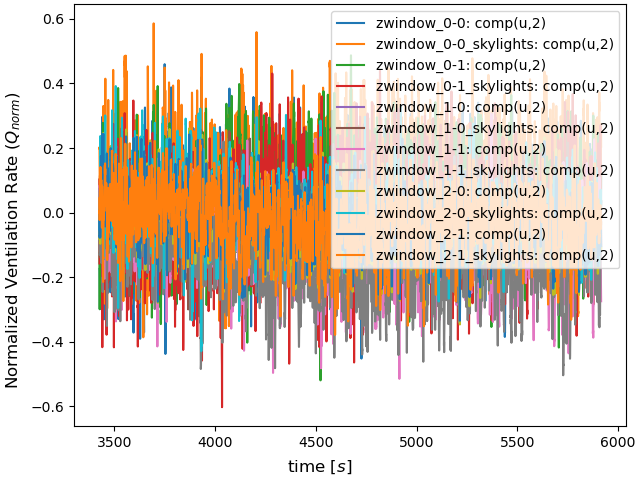

In [7]:
norm_norm = probePost.quick_apply(
    lambda df: probePost.mul_names(df, ['zwindow_0-1', 'zwindow_1-1', 'zwindow_2-1'], -1)
)

(fig, ax) = probes2.time_plots(
    names = [name for name in  probes2.probe_names if "zwindow" in name], 
    steps = probes2.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes2.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature],
    parrallel=True
    )

## mean statistics
z_mean = ventilation_scaling * probes2.statistics(
    names = [name for name in  probes2.probe_names if "zwindow" in name], 
    steps = probes2.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average, norm_norm],
    parrallel=False
    )

## rms statistics
z_rms = probes2.statistics(
    names = [name for name in  probes2.probe_names if "zwindow" in name], 
    steps = probes2.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
z_net = probes2.statistics(
    names = [name for name in  probes2.probe_names if "zwindow" in name], 
    steps = probes2.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )

display(z_mean)
display(z_rms)
display(z_net)

In [8]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows')

z_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zmean.csv')
z_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zrms.csv')
z_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/znet.csv')

/tmp/ipykernel_15423/257389554.py:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows')


## Y Flow


processing data took 21 seconds
processing data took 21 seconds
processing data took 20 seconds
processing data took 20 seconds


,"comp(u,2)"
skylight_0-0_skylights,0.011895
skylight_0-1_skylights,0.020635
skylight_1-0_skylights,-0.055098
skylight_1-1_skylights,0.072624
skylight_2-0_skylights,-0.081533
skylight_2-1_skylights,0.071676


,"comp(u,2)"
skylight_0-0_skylights,0.041424
skylight_0-1_skylights,0.032390
skylight_1-0_skylights,0.021440
skylight_1-1_skylights,0.039562
skylight_2-0_skylights,0.018559
skylight_2-1_skylights,0.017888


,"comp(u,0)"
skylight_0-0_skylights,0.037887
skylight_0-1_skylights,0.107428
skylight_1-0_skylights,0.024180
skylight_1-1_skylights,0.022679
skylight_2-0_skylights,0.026284
skylight_2-1_skylights,0.020221


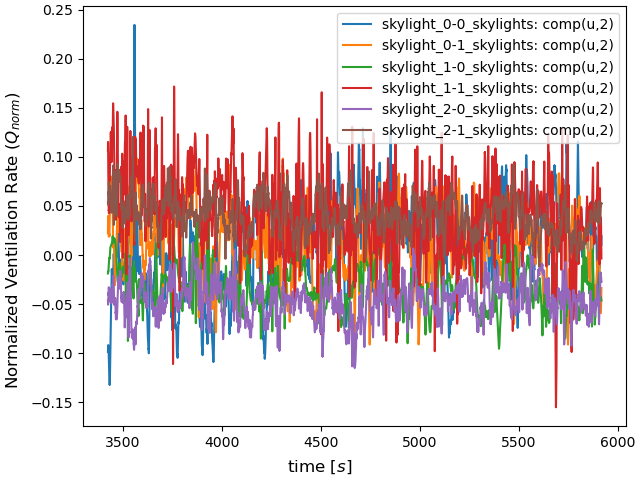

In [9]:
(fig, ax) = probes2.time_plots(
    names = [name for name in  probes2.probe_names if "skylight_" in name], 
    steps = probes2.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes2.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature],
    parrallel=True
    )

## mean statistics
y_mean = ventilation_scaling * probes2.statistics(
    names = [name for name in  probes2.probe_names if "skylight_" in name], 
    steps = probes2.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average],
    parrallel=False
    )

## rms statistics
y_rms = probes2.statistics(
    names = [name for name in  probes2.probe_names if "skylight_" in name], 
    steps = probes2.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
y_net = probes2.statistics(
    names = [name for name in  probes2.probe_names if "skylight_" in name], 
    steps = probes2.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )

display(y_mean)
display(y_rms)
display(y_net)

In [10]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/ywindows')

y_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ymean.csv')
y_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/yrms.csv')
y_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ynet.csv')

# Run 3 - 90 deg wind

In [11]:
run = 3

probes_dir = f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut'

probes3 = probePost.Probes(probes_dir)
probes3.get_locations(probes_dir)


## X Flow


processing data took 11 seconds
processing data took 10 seconds
processing data took 10 seconds
processing data took 10 seconds


,"comp(u,0)"
xwindow_0-0,-0.538217
xwindow_0-0_skylights,-0.478428
xwindow_0-1,0.145142
xwindow_0-1_skylights,0.187767


,"comp(u,0)"
xwindow_0-0,0.313941
xwindow_0-0_skylights,0.377503
xwindow_0-1,0.208943
xwindow_0-1_skylights,0.202678


,"comp(u,0)"
xwindow_0-0,0.549088
xwindow_0-0_skylights,0.524365
xwindow_0-1,0.204141
xwindow_0-1_skylights,0.222955


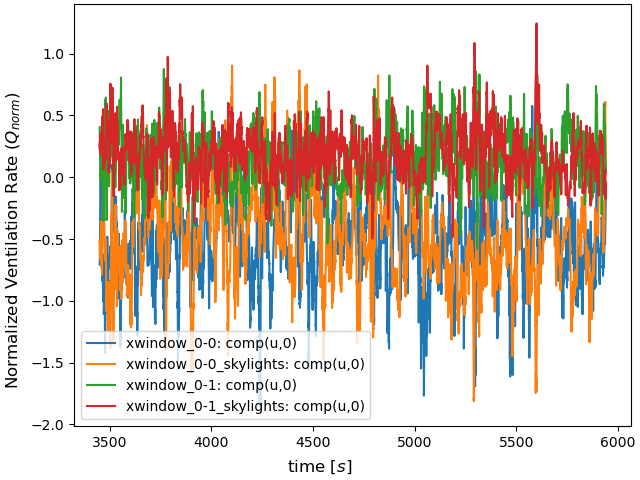

In [12]:
norm_norm = probePost.quick_apply(
    lambda df: probePost.mul_names(df, ['xwindow_2-0', 'xwindow_2-1'], -1)
)

(fig, ax) = probes3.time_plots(
    names = [name for name in  probes3.probe_names if "xwindow" in name], 
    steps = probes3.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes3.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature, norm_norm],
    parrallel=True
    )

## mean statistics
x_mean = probes3.statistics(
    names = [name for name in  probes3.probe_names if "xwindow" in name], 
    steps = probes3.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average, norm_norm],
    parrallel=False
    )

## rms statistics
x_rms = probes3.statistics(
    names = [name for name in  probes3.probe_names if "xwindow" in name], 
    steps = probes3.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
x_net = probes3.statistics(
    names = [name for name in  probes3.probe_names if "xwindow" in name], 
    steps = probes3.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )


display(x_mean)
display(x_rms)
display(x_net)

In [13]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/xwindows')

x_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xmean.csv')
x_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xrms.csv')
x_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xnet.csv')

## Z Flow


processing data took 32 seconds
processing data took 30 seconds
processing data took 30 seconds
processing data took 32 seconds


,"comp(u,2)"
zwindow_0-0,0.919311
zwindow_0-0_skylights,0.652406
zwindow_0-1,-0.321410
zwindow_0-1_skylights,0.056824
zwindow_1-0,-0.010423
zwindow_1-0_skylights,0.124768
zwindow_1-1,0.142089
zwindow_1-1_skylights,-0.436503
zwindow_2-0,1.075626
zwindow_2-0_skylights,1.033109


,"comp(u,2)"
zwindow_0-0,0.305235
zwindow_0-0_skylights,0.295863
zwindow_0-1,0.274828
zwindow_0-1_skylights,0.280784
zwindow_1-0,0.012803
zwindow_1-0_skylights,0.266654
zwindow_1-1,0.289176
zwindow_1-1_skylights,0.247935
zwindow_2-0,0.253048
zwindow_2-0_skylights,0.230625


,"comp(u,0)"
zwindow_0-0,0.748703
zwindow_0-0_skylights,0.643597
zwindow_0-1,0.132023
zwindow_0-1_skylights,0.175773
zwindow_1-0,0.440211
zwindow_1-0_skylights,0.488111
zwindow_1-1,0.183557
zwindow_1-1_skylights,0.223125
zwindow_2-0,0.713833
zwindow_2-0_skylights,0.715634


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


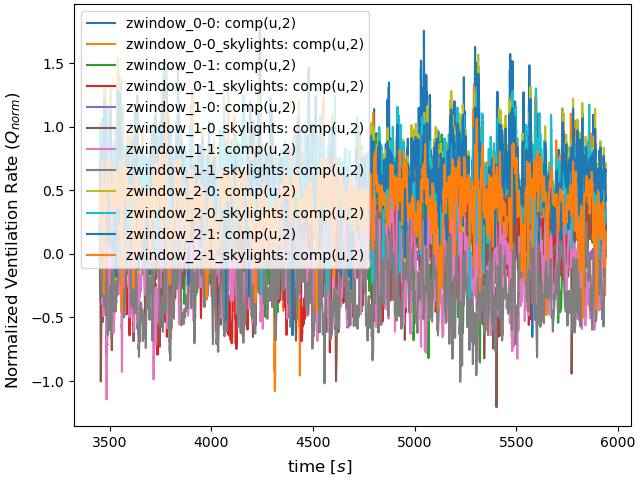

In [14]:
norm_norm = probePost.quick_apply(
    lambda df: probePost.mul_names(df, ['zwindow_0-1', 'zwindow_1-1', 'zwindow_2-1'], -1)
)

(fig, ax) = probes3.time_plots(
    names = [name for name in  probes3.probe_names if "zwindow" in name], 
    steps = probes3.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes3.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature],
    parrallel=True
    )

## mean statistics
z_mean = ventilation_scaling * probes3.statistics(
    names = [name for name in  probes3.probe_names if "zwindow" in name], 
    steps = probes3.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average, norm_norm],
    parrallel=False
    )

## rms statistics
z_rms = probes3.statistics(
    names = [name for name in  probes3.probe_names if "zwindow" in name], 
    steps = probes3.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
z_net = probes3.statistics(
    names = [name for name in  probes3.probe_names if "zwindow" in name], 
    steps = probes3.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )

display(z_mean)
display(z_rms)
display(z_net)

In [15]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows')

z_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zmean.csv')
z_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zrms.csv')
z_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/znet.csv')

/tmp/ipykernel_15423/257389554.py:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows')


## Y Flow


processing data took 16 seconds
processing data took 15 seconds
processing data took 15 seconds
processing data took 16 seconds


,"comp(u,2)"
skylight_0-0_skylights,0.029390
skylight_0-1_skylights,0.033594
skylight_1-0_skylights,-0.065545
skylight_1-1_skylights,0.096161
skylight_2-0_skylights,0.055080
skylight_2-1_skylights,-0.072272


,"comp(u,2)"
skylight_0-0_skylights,0.135615
skylight_0-1_skylights,0.057083
skylight_1-0_skylights,0.064671
skylight_1-1_skylights,0.047647
skylight_2-0_skylights,0.193592
skylight_2-1_skylights,0.071813


,"comp(u,0)"
skylight_0-0_skylights,0.066823
skylight_0-1_skylights,0.077649
skylight_1-0_skylights,0.034143
skylight_1-1_skylights,0.049081
skylight_2-0_skylights,0.074812
skylight_2-1_skylights,0.072779


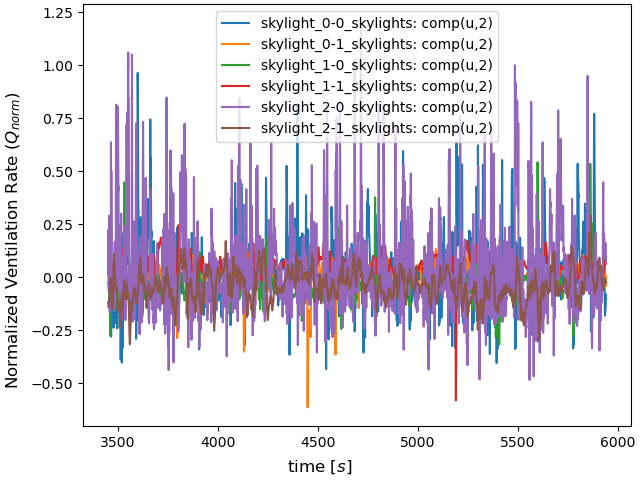

In [16]:
(fig, ax) = probes3.time_plots(
    names = [name for name in  probes3.probe_names if "skylight_" in name], 
    steps = probes3.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes3.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature],
    parrallel=True
    )

## mean statistics
y_mean = ventilation_scaling * probes3.statistics(
    names = [name for name in  probes3.probe_names if "skylight_" in name], 
    steps = probes3.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average],
    parrallel=False
    )

## rms statistics
y_rms = probes3.statistics(
    names = [name for name in  probes3.probe_names if "skylight_" in name], 
    steps = probes3.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
y_net = probes3.statistics(
    names = [name for name in  probes3.probe_names if "skylight_" in name], 
    steps = probes3.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )

display(y_mean)
display(y_rms)
display(y_net)

In [17]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/ywindows')

y_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ymean.csv')
y_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/yrms.csv')
y_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ynet.csv')

# Run 4 - 180 deg wind

In [18]:
run = 4

probes_dir = f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut'

probes4 = probePost.Probes(probes_dir)
probes4.get_locations(probes_dir)


## X Flow


processing data took 14 seconds
processing data took 14 seconds
processing data took 14 seconds
processing data took 14 seconds


,"comp(u,0)"
xwindow_0-0,-0.160295
xwindow_0-0_skylights,-0.143182
xwindow_0-1,-0.120872
xwindow_0-1_skylights,-0.138695


,"comp(u,0)"
xwindow_0-0,0.206394
xwindow_0-0_skylights,0.204092
xwindow_0-1,0.213371
xwindow_0-1_skylights,0.243788


,"comp(u,0)"
xwindow_0-0,0.209064
xwindow_0-0_skylights,0.202050
xwindow_0-1,0.198983
xwindow_0-1_skylights,0.232811


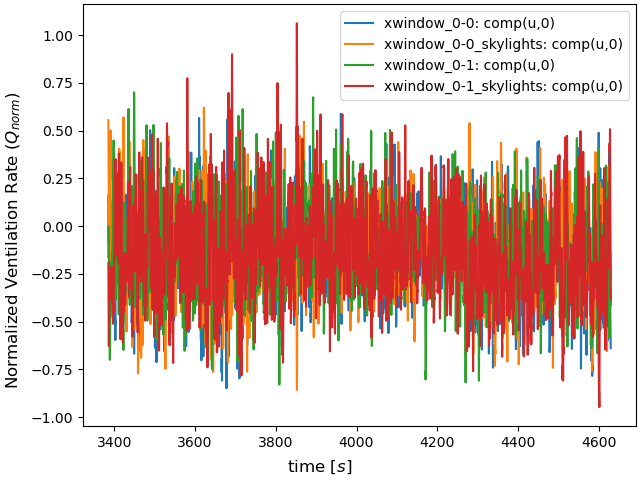

In [19]:
norm_norm = probePost.quick_apply(
    lambda df: probePost.mul_names(df, ['xwindow_2-0', 'xwindow_2-1'], -1)
)

(fig, ax) = probes4.time_plots(
    names = [name for name in  probes4.probe_names if "xwindow" in name], 
    steps = probes4.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes4.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature, norm_norm],
    parrallel=True
    )

## mean statistics
x_mean = probes4.statistics(
    names = [name for name in  probes4.probe_names if "xwindow" in name], 
    steps = probes4.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average, norm_norm],
    parrallel=False
    )

## rms statistics
x_rms = probes4.statistics(
    names = [name for name in  probes4.probe_names if "xwindow" in name], 
    steps = probes4.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
x_net = probes4.statistics(
    names = [name for name in  probes4.probe_names if "xwindow" in name], 
    steps = probes4.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )


display(x_mean)
display(x_rms)
display(x_net)

In [20]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/xwindows')

x_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xmean.csv')
x_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xrms.csv')
x_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xnet.csv')

## Z Flow


processing data took 43 seconds
processing data took 42 seconds
processing data took 41 seconds
processing data took 42 seconds


,"comp(u,2)"
zwindow_0-0,0.240446
zwindow_0-0_skylights,0.251726
zwindow_0-1,0.164390
zwindow_0-1_skylights,-0.159383
zwindow_1-0,-0.022289
zwindow_1-0_skylights,-0.003471
zwindow_1-1,-0.019950
zwindow_1-1_skylights,0.041104
zwindow_2-0,-0.355623
zwindow_2-0_skylights,0.271946


,"comp(u,2)"
zwindow_0-0,0.206903
zwindow_0-0_skylights,0.209088
zwindow_0-1,0.150152
zwindow_0-1_skylights,0.162449
zwindow_1-0,0.017698
zwindow_1-0_skylights,0.111179
zwindow_1-1,0.159969
zwindow_1-1_skylights,0.154106
zwindow_2-0,0.317121
zwindow_2-0_skylights,0.353104


,"comp(u,0)"
zwindow_0-0,1.284552
zwindow_0-0_skylights,1.361442
zwindow_0-1,0.890540
zwindow_0-1_skylights,0.871136
zwindow_1-0,1.084587
zwindow_1-0_skylights,1.171075
zwindow_1-1,0.764950
zwindow_1-1_skylights,0.704591
zwindow_2-0,0.742435
zwindow_2-0_skylights,1.062291


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


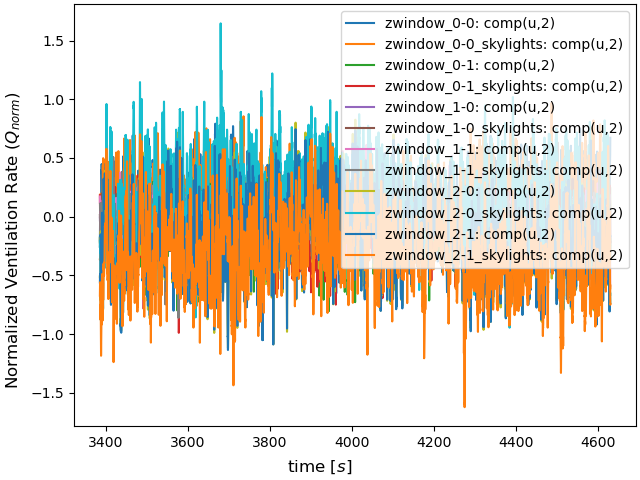

In [21]:
norm_norm = probePost.quick_apply(
    lambda df: probePost.mul_names(df, ['zwindow_0-1', 'zwindow_1-1', 'zwindow_2-1'], -1)
)

(fig, ax) = probes4.time_plots(
    names = [name for name in  probes4.probe_names if "zwindow" in name], 
    steps = probes4.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes4.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature],
    parrallel=True
    )

## mean statistics
z_mean = ventilation_scaling * probes4.statistics(
    names = [name for name in  probes4.probe_names if "zwindow" in name], 
    steps = probes4.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average, norm_norm],
    parrallel=False
    )

## rms statistics
z_rms = probes4.statistics(
    names = [name for name in  probes4.probe_names if "zwindow" in name], 
    steps = probes4.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
z_net = probes4.statistics(
    names = [name for name in  probes4.probe_names if "zwindow" in name], 
    steps = probes4.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )

display(z_mean)
display(z_rms)
display(z_net)

In [22]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows')

z_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zmean.csv')
z_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zrms.csv')
z_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/znet.csv')

/tmp/ipykernel_15423/257389554.py:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows')


## Y Flow


processing data took 21 seconds
processing data took 21 seconds
processing data took 20 seconds
processing data took 21 seconds


,"comp(u,2)"
skylight_0-0_skylights,-0.109262
skylight_0-1_skylights,0.141526
skylight_1-0_skylights,-0.103967
skylight_1-1_skylights,0.146325
skylight_2-0_skylights,-0.129615
skylight_2-1_skylights,0.203847


,"comp(u,2)"
skylight_0-0_skylights,0.042283
skylight_0-1_skylights,0.054789
skylight_1-0_skylights,0.036110
skylight_1-1_skylights,0.040736
skylight_2-0_skylights,0.104034
skylight_2-1_skylights,0.060093


,"comp(u,0)"
skylight_0-0_skylights,0.066567
skylight_0-1_skylights,0.059151
skylight_1-0_skylights,0.040543
skylight_1-1_skylights,0.036900
skylight_2-0_skylights,0.063978
skylight_2-1_skylights,0.074038


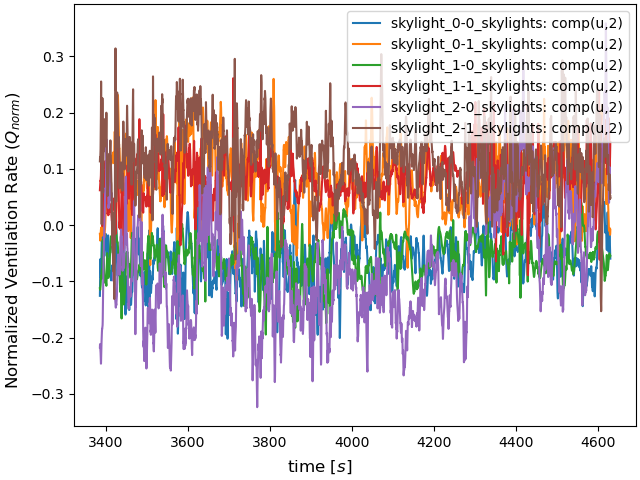

In [23]:
(fig, ax) = probes4.time_plots(
    names = [name for name in  probes4.probe_names if "skylight_" in name], 
    steps = probes4.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes4.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature],
    parrallel=True
    )

## mean statistics
y_mean = ventilation_scaling * probes4.statistics(
    names = [name for name in  probes4.probe_names if "skylight_" in name], 
    steps = probes4.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average],
    parrallel=False
    )

## rms statistics
y_rms = probes4.statistics(
    names = [name for name in  probes4.probe_names if "skylight_" in name], 
    steps = probes4.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
y_net = probes4.statistics(
    names = [name for name in  probes4.probe_names if "skylight_" in name], 
    steps = probes4.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )

display(y_mean)
display(y_rms)
display(y_net)

In [24]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/ywindows')

y_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ymean.csv')
y_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/yrms.csv')
y_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ynet.csv')

# Run 5 - 270 deg wind

In [25]:
run = 5

probes_dir = f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut'

probes5 = probePost.Probes(probes_dir)
probes5.get_locations(probes_dir)


## X Flow


processing data took 18 seconds
processing data took 17 seconds
processing data took 17 seconds
processing data took 17 seconds


,"comp(u,0)"
xwindow_0-0,0.175949
xwindow_0-0_skylights,0.264238
xwindow_0-1,-0.705572
xwindow_0-1_skylights,-0.704657


,"comp(u,0)"
xwindow_0-0,0.235057
xwindow_0-0_skylights,0.202574
xwindow_0-1,0.418920
xwindow_0-1_skylights,0.429168


,"comp(u,0)"
xwindow_0-0,0.240048
xwindow_0-0_skylights,0.284994
xwindow_0-1,0.722326
xwindow_0-1_skylights,0.730919


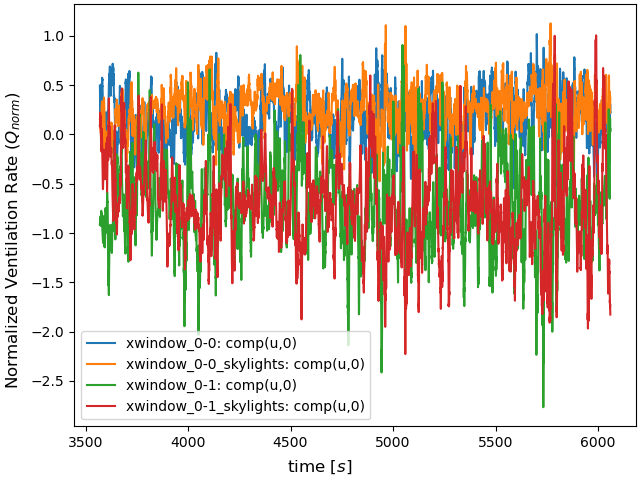

In [26]:
norm_norm = probePost.quick_apply(
    lambda df: probePost.mul_names(df, ['xwindow_2-0', 'xwindow_2-1'], -1)
)

(fig, ax) = probes5.time_plots(
    names = [name for name in  probes5.probe_names if "xwindow" in name], 
    steps = probes5.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes5.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature, norm_norm],
    parrallel=True
    )

## mean statistics
x_mean = probes5.statistics(
    names = [name for name in  probes5.probe_names if "xwindow" in name], 
    steps = probes5.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average, norm_norm],
    parrallel=False
    )

## rms statistics
x_rms = probes5.statistics(
    names = [name for name in  probes5.probe_names if "xwindow" in name], 
    steps = probes5.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
x_net = probes5.statistics(
    names = [name for name in  probes5.probe_names if "xwindow" in name], 
    steps = probes5.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )


display(x_mean)
display(x_rms)
display(x_net)

In [27]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/xwindows')

x_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xmean.csv')
x_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xrms.csv')
x_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xnet.csv')

## Z Flow


processing data took 55 seconds
processing data took 53 seconds
processing data took 53 seconds
processing data took 54 seconds


,"comp(u,2)"
zwindow_0-0,-0.357089
zwindow_0-0_skylights,-0.205162
zwindow_0-1,0.586477
zwindow_0-1_skylights,-0.461316
zwindow_1-0,-0.005777
zwindow_1-0_skylights,0.440147
zwindow_1-1,0.727486
zwindow_1-1_skylights,-0.553060
zwindow_2-0,-1.224508
zwindow_2-0_skylights,-0.916201


,"comp(u,2)"
zwindow_0-0,0.247262
zwindow_0-0_skylights,0.268611
zwindow_0-1,0.326957
zwindow_0-1_skylights,0.365735
zwindow_1-0,0.012549
zwindow_1-0_skylights,0.166520
zwindow_1-1,0.341657
zwindow_1-1_skylights,0.342422
zwindow_2-0,0.304205
zwindow_2-0_skylights,0.316381


,"comp(u,0)"
zwindow_0-0,0.219928
zwindow_0-0_skylights,0.255829
zwindow_0-1,0.463831
zwindow_0-1_skylights,0.404222
zwindow_1-0,0.320437
zwindow_1-0_skylights,0.366115
zwindow_1-1,0.382755
zwindow_1-1_skylights,0.360980
zwindow_2-0,0.130210
zwindow_2-0_skylights,0.158726


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


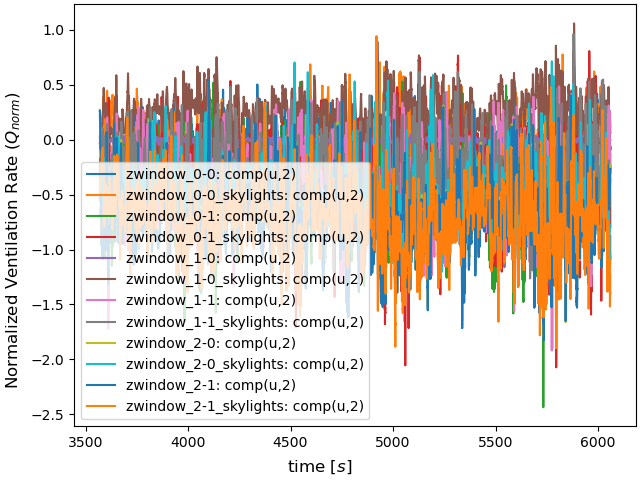

In [28]:
norm_norm = probePost.quick_apply(
    lambda df: probePost.mul_names(df, ['zwindow_0-1', 'zwindow_1-1', 'zwindow_2-1'], -1)
)

(fig, ax) = probes5.time_plots(
    names = [name for name in  probes5.probe_names if "zwindow" in name], 
    steps = probes5.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes5.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature],
    parrallel=True
    )

## mean statistics
z_mean = ventilation_scaling * probes5.statistics(
    names = [name for name in  probes5.probe_names if "zwindow" in name], 
    steps = probes5.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average, norm_norm],
    parrallel=False
    )

## rms statistics
z_rms = probes5.statistics(
    names = [name for name in  probes5.probe_names if "zwindow" in name], 
    steps = probes5.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
z_net = probes5.statistics(
    names = [name for name in  probes5.probe_names if "zwindow" in name], 
    steps = probes5.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )

display(z_mean)
display(z_rms)
display(z_net)

In [29]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows')

z_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zmean.csv')
z_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zrms.csv')
z_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/znet.csv')

/tmp/ipykernel_15423/257389554.py:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows')


## Y Flow


processing data took 28 seconds
processing data took 28 seconds
processing data took 27 seconds
processing data took 26 seconds


,"comp(u,2)"
skylight_0-0_skylights,-0.019775
skylight_0-1_skylights,0.000424
skylight_1-0_skylights,-0.085583
skylight_1-1_skylights,-0.014862
skylight_2-0_skylights,0.122694
skylight_2-1_skylights,-0.121163


,"comp(u,2)"
skylight_0-0_skylights,0.053999
skylight_0-1_skylights,0.124065
skylight_1-0_skylights,0.043618
skylight_1-1_skylights,0.155053
skylight_2-0_skylights,0.086383
skylight_2-1_skylights,0.239317


,"comp(u,0)"
skylight_0-0_skylights,0.060730
skylight_0-1_skylights,0.133252
skylight_1-0_skylights,0.038080
skylight_1-1_skylights,0.060920
skylight_2-0_skylights,0.073770
skylight_2-1_skylights,0.077045


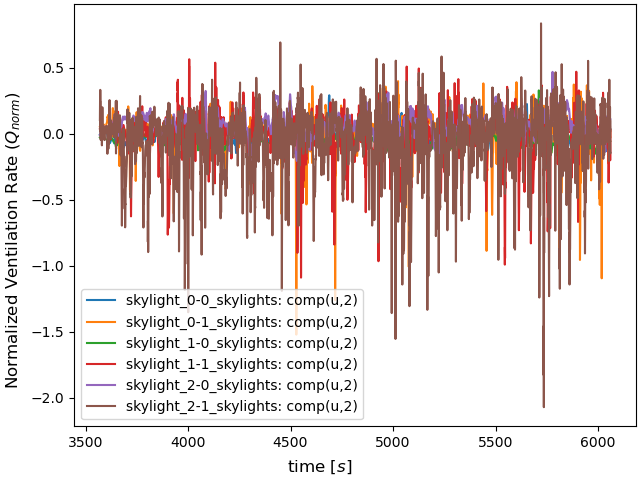

In [30]:
(fig, ax) = probes5.time_plots(
    names = [name for name in  probes5.probe_names if "skylight_" in name], 
    steps = probes5.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes5.probe_times,
        },
    processing = [norm_vent, probePost.linear_quadrature],
    parrallel=True
    )

## mean statistics
y_mean = ventilation_scaling * probes5.statistics(
    names = [name for name in  probes5.probe_names if "skylight_" in name], 
    steps = probes5.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_average],
    parrallel=False
    )

## rms statistics
y_rms = probes5.statistics(
    names = [name for name in  probes5.probe_names if "skylight_" in name], 
    steps = probes5.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.linear_quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
y_net = probes5.statistics(
    names = [name for name in  probes5.probe_names if "skylight_" in name], 
    steps = probes5.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.linear_quadrature, abs_values, probePost.time_average],
    parrallel=False
    )

display(y_mean)
display(y_rms)
display(y_net)

In [31]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/ywindows')

y_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ymean.csv')
y_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/yrms.csv')
y_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ynet.csv')